In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
user = pd.read_csv('rating.csv')
user.sample(10)

,user_id,anime_id,rating
5134311,49029,165,8
2956921,27468,27899,7
3248417,29993,4898,8
4644211,44444,7769,6
2969515,27565,849,8
2195050,21247,4382,7
1360194,12909,11703,8
982009,9091,9989,5
1017467,9641,1448,-1
507618,5144,997,6


In [4]:
print("Shape of anime dataset {}".format(anime.shape))

Shape of anime dataset (12294, 7)


In [5]:
print("Shape of user dataset {}".format(user.shape))

Shape of user dataset (7813737, 3)


In [6]:
user[user['user_id'] == 1].rating.mean()

-0.7124183006535948

In [7]:
user[user['user_id'] == 7].rating.mean()

7.387755102040816

In [8]:
Mean_Rate = user.groupby(['user_id']).mean().reset_index()
print(Mean_Rate.head(10))
print("Shape of this datset is {}".format(Mean_Rate.shape))

   user_id      anime_id    rating
0        1  12888.483660 -0.712418
1        2  13459.000000  2.666667
2        3  13352.744681  7.382979
3        4  10135.403846 -1.000000
4        5  11023.301927  4.263383
5        6   7752.135135 -1.000000
6        7  15824.320700  7.387755
7        8   8699.166667  8.333333
8        9   1887.000000  8.000000
9       10   8579.875000  2.875000
Shape of this datset is (73515, 3)


In [9]:
Mean_Rate['mean_rating'] = Mean_Rate['rating']
print(Mean_Rate.head())

   user_id      anime_id    rating  mean_rating
0        1  12888.483660 -0.712418    -0.712418
1        2  13459.000000  2.666667     2.666667
2        3  13352.744681  7.382979     7.382979
3        4  10135.403846 -1.000000    -1.000000
4        5  11023.301927  4.263383     4.263383


In [10]:
Mean_Rate.drop(['anime_id','rating'], axis=1,inplace=True)
print(Mean_Rate.head())

   user_id  mean_rating
0        1    -0.712418
1        2     2.666667
2        3     7.382979
3        4    -1.000000
4        5     4.263383


In [11]:
user = pd.merge(user, Mean_Rate, on=['user_id', 'user_id'])
print(user.head())

   user_id  anime_id  rating  mean_rating
0        1        20      -1    -0.712418
1        1        24      -1    -0.712418
2        1        79      -1    -0.712418
3        1       226      -1    -0.712418
4        1       241      -1    -0.712418


In [12]:
#If user rating is less then mean_rating we drop that column as we are looking which anime is liked by the user
user = user.drop(user[user.rating < user.mean_rating].index)

In [13]:
print(user[user['user_id'] == 1])

     user_id  anime_id  rating  mean_rating
47         1      8074      10    -0.712418
81         1     11617      10    -0.712418
83         1     11757      10    -0.712418
101        1     15451      10    -0.712418


In [14]:
print(user[user['user_id'] == 7])

      user_id  anime_id  rating  mean_rating
807         7        30      10     7.387755
808         7        31       9     7.387755
809         7        32       9     7.387755
811         7        64       8     7.387755
813         7       111       8     7.387755
...       ...       ...     ...          ...
1121        7     31149       8     7.387755
1130        7     31704       8     7.387755
1131        7     31716       8     7.387755
1140        7     32093       8     7.387755
1147        7     33091       8     7.387755

[164 rows x 4 columns]


In [15]:
print("Updated shape of the user is now {}".format(user.shape))

Updated shape of the user is now (4262566, 4)


In [16]:
unique_user = np.unique(user['user_id'])
print(unique_user)
print(len(unique_user))

[    1     2     3 ... 73514 73515 73516]
73515


In [17]:
user = user.rename({'rating':'userRating'}, axis='columns')
print(user.head())

     user_id  anime_id  userRating  mean_rating
47         1      8074          10    -0.712418
81         1     11617          10    -0.712418
83         1     11757          10    -0.712418
101        1     15451          10    -0.712418
153        2     11771          10     2.666667


In [54]:
mergedata = pd.merge(anime, user, on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298


In [19]:
unique_user = np.unique(mergedata['user_id'])
print(unique_user)
print(len(unique_user))

[    1     2     3 ... 19998 19999 20000]
20000


In [20]:
unique_anime = np.unique(mergedata['anime_id'])
print(unique_anime)
print(len(unique_anime))
unique_anime = np.unique(mergedata['name'])
print(unique_anime)
print(len(unique_anime))

[    1     5     6 ... 34325 34349 34475]
7852
['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi'
 '&quot;Bungaku Shoujo&quot; Memoire' '&quot;Bungaku Shoujo&quot; Movie'
 ... 'xxxHOLiC Movie: Manatsu no Yoru no Yume' 'xxxHOLiC Rou'
 'xxxHOLiC Shunmuki']
7852


In [22]:
#Now we are going to create a crosstable of 'user_id' and 'name' using pandas.crosstab
#here we use 'user_id' as row or index and 'name' as column
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.sample(5)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
user_anime.shape

(20000, 7852)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_anime)
pca = pca.transform(user_anime)

In [56]:
ps = pd.DataFrame(pca)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415759
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985781
3,0.199435,-0.291005,0.681044
4,3.532125,-0.184796,-0.743305


In [57]:
ps.shape

(20000, 3)

In [58]:
#Cluster
tocluster = pd.DataFrame(ps[[0,1,2]])
tocluster.head()

,0,1,2
0,-1.579129,-0.500240,0.415759
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985781
3,0.199435,-0.291005,0.681044
4,3.532125,-0.184796,-0.743305


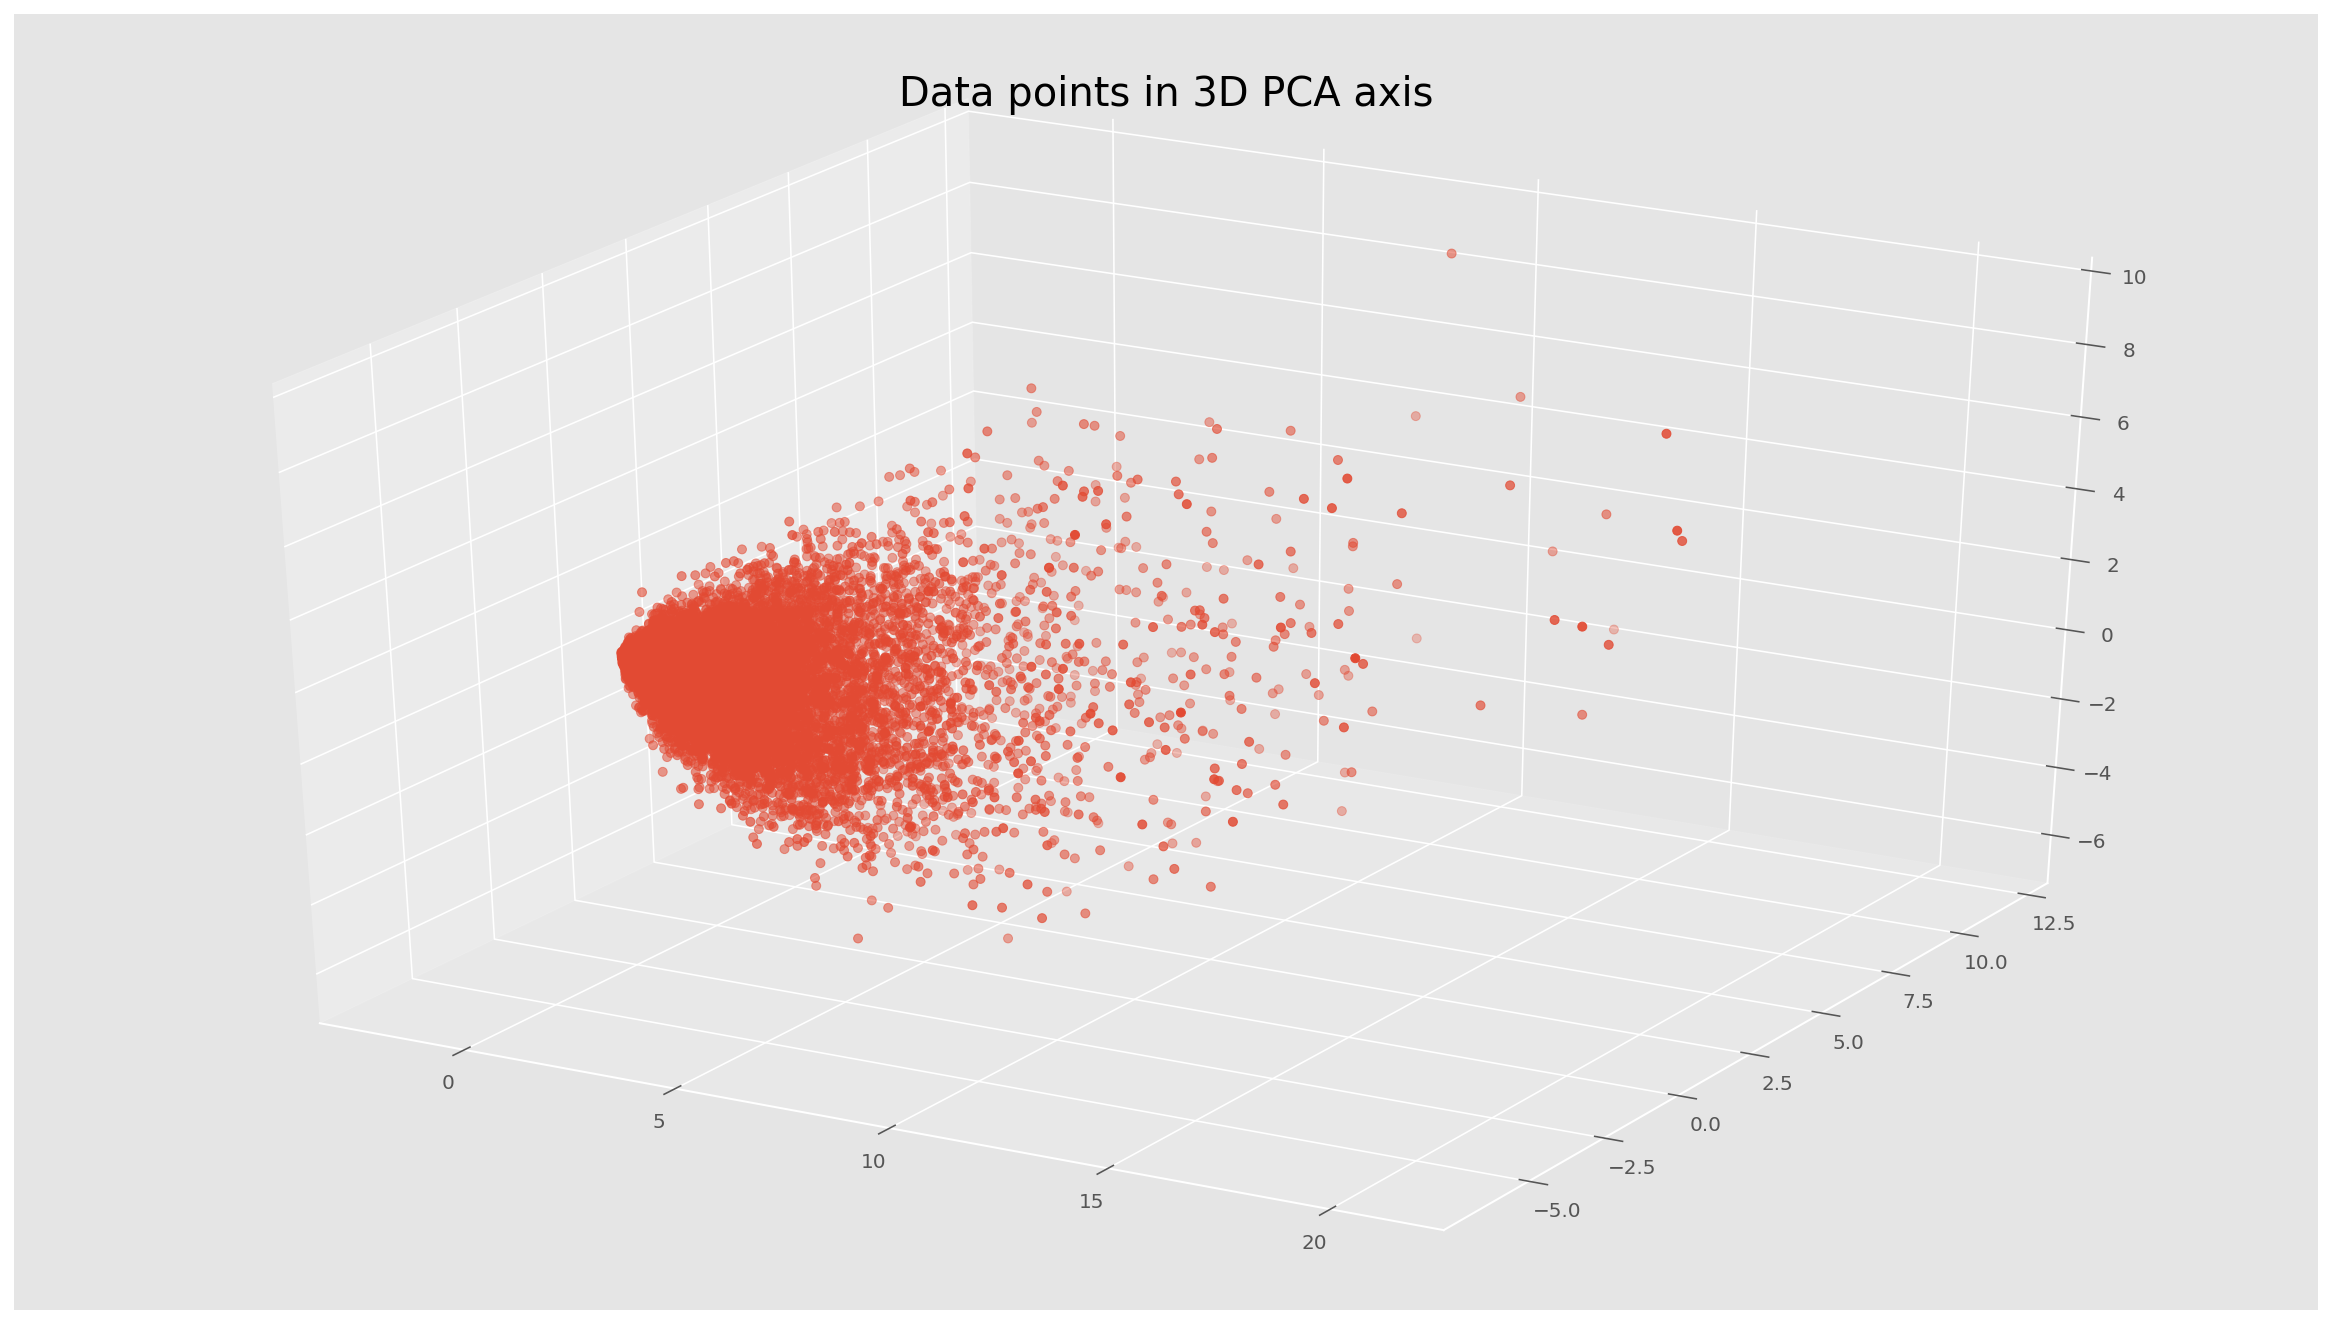

In [59]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [31]:
from sklearn.cluster import KMeans

no_of_cluster = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in no_of_cluster]
print(kmeans)

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy

In [32]:
#Score of every no of cluster
score = [kmeans[i].fit(tocluster).score(tocluster) for i in range(len(kmeans))]
print(score)

[-85915.22832668459, -69012.92718037235, -55587.81903591507, -48546.16705650718, -43142.18162903335, -38334.81353260562, -35144.88282128958, -32709.00936553289]


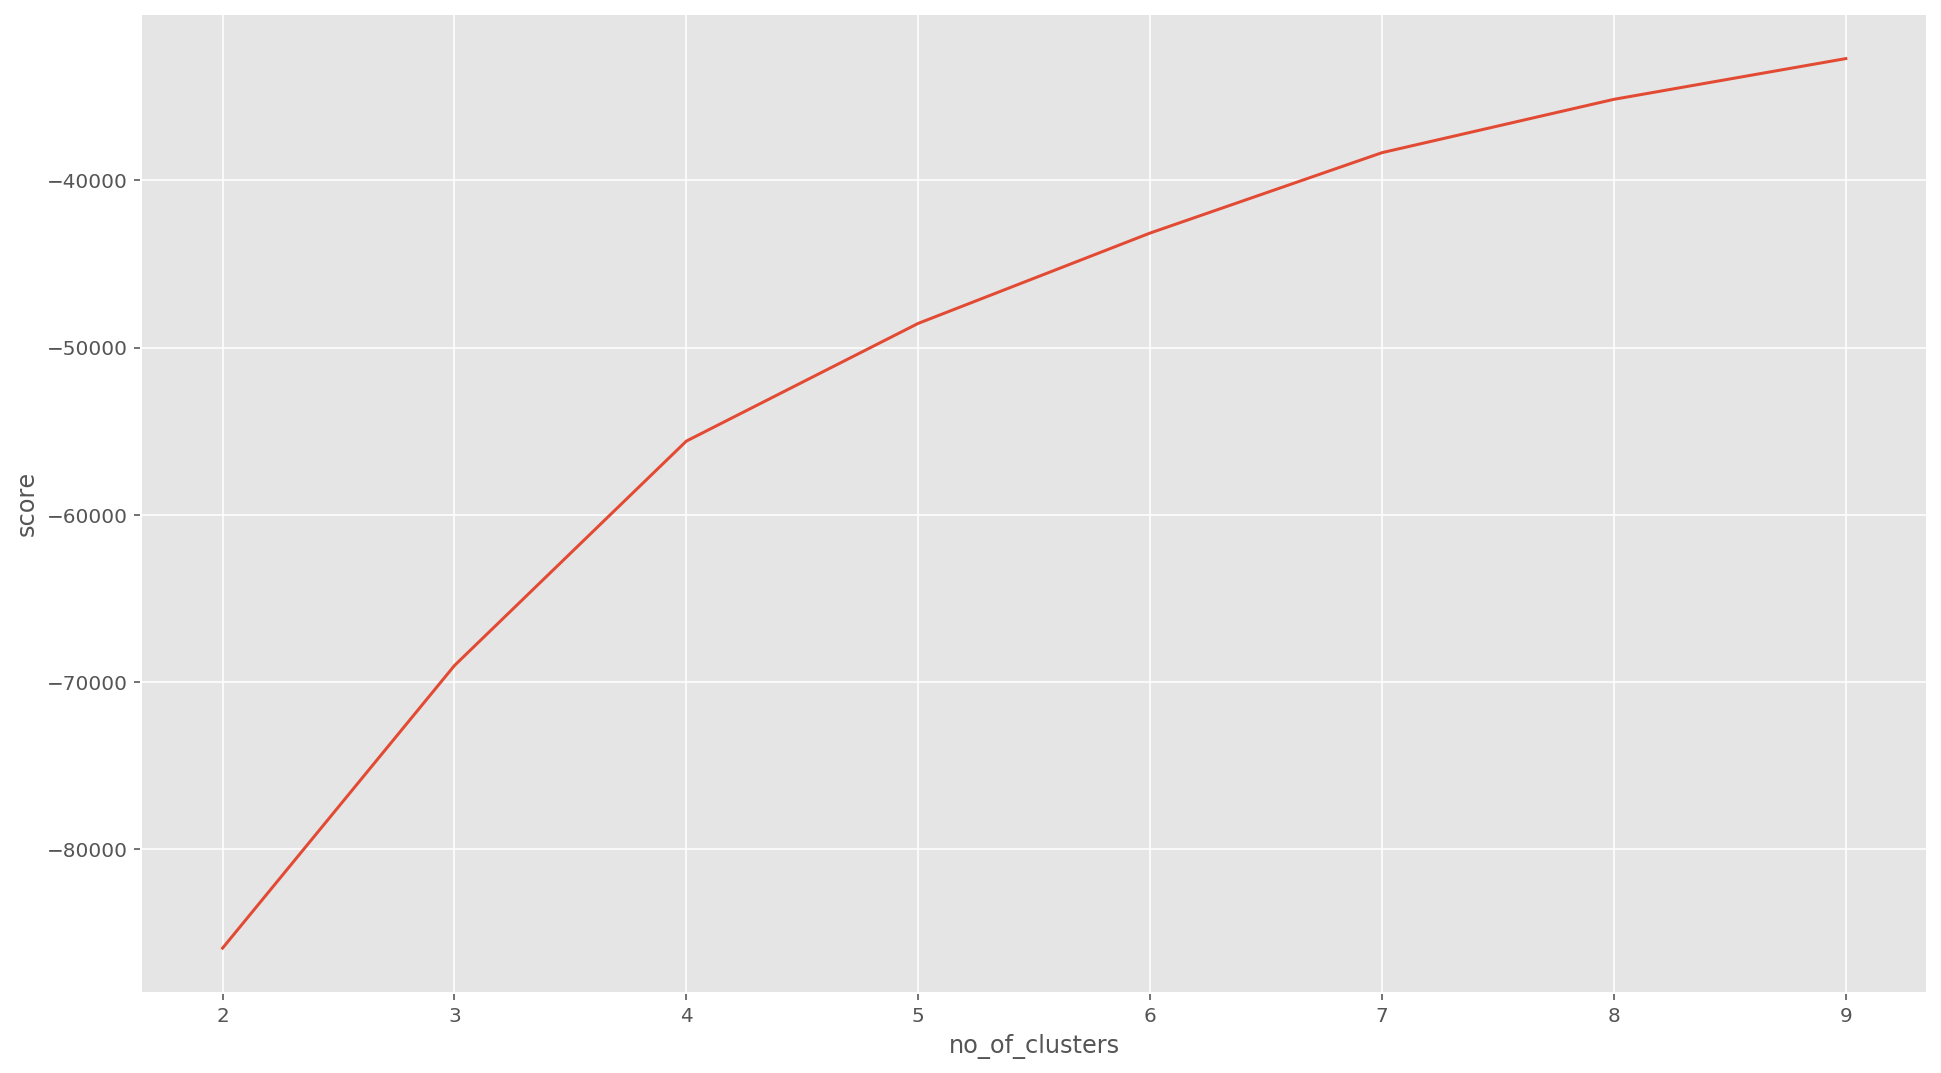

In [33]:
plt.plot(no_of_cluster, score)
plt.xlabel('no_of_clusters')
plt.ylabel('score')
plt.show()

In [37]:
#Silhouette score
from sklearn.metrics import silhouette_score
score = []
inertia_list = np.empty(10)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    score.append(silhouette_score(tocluster, kmeans.labels_))

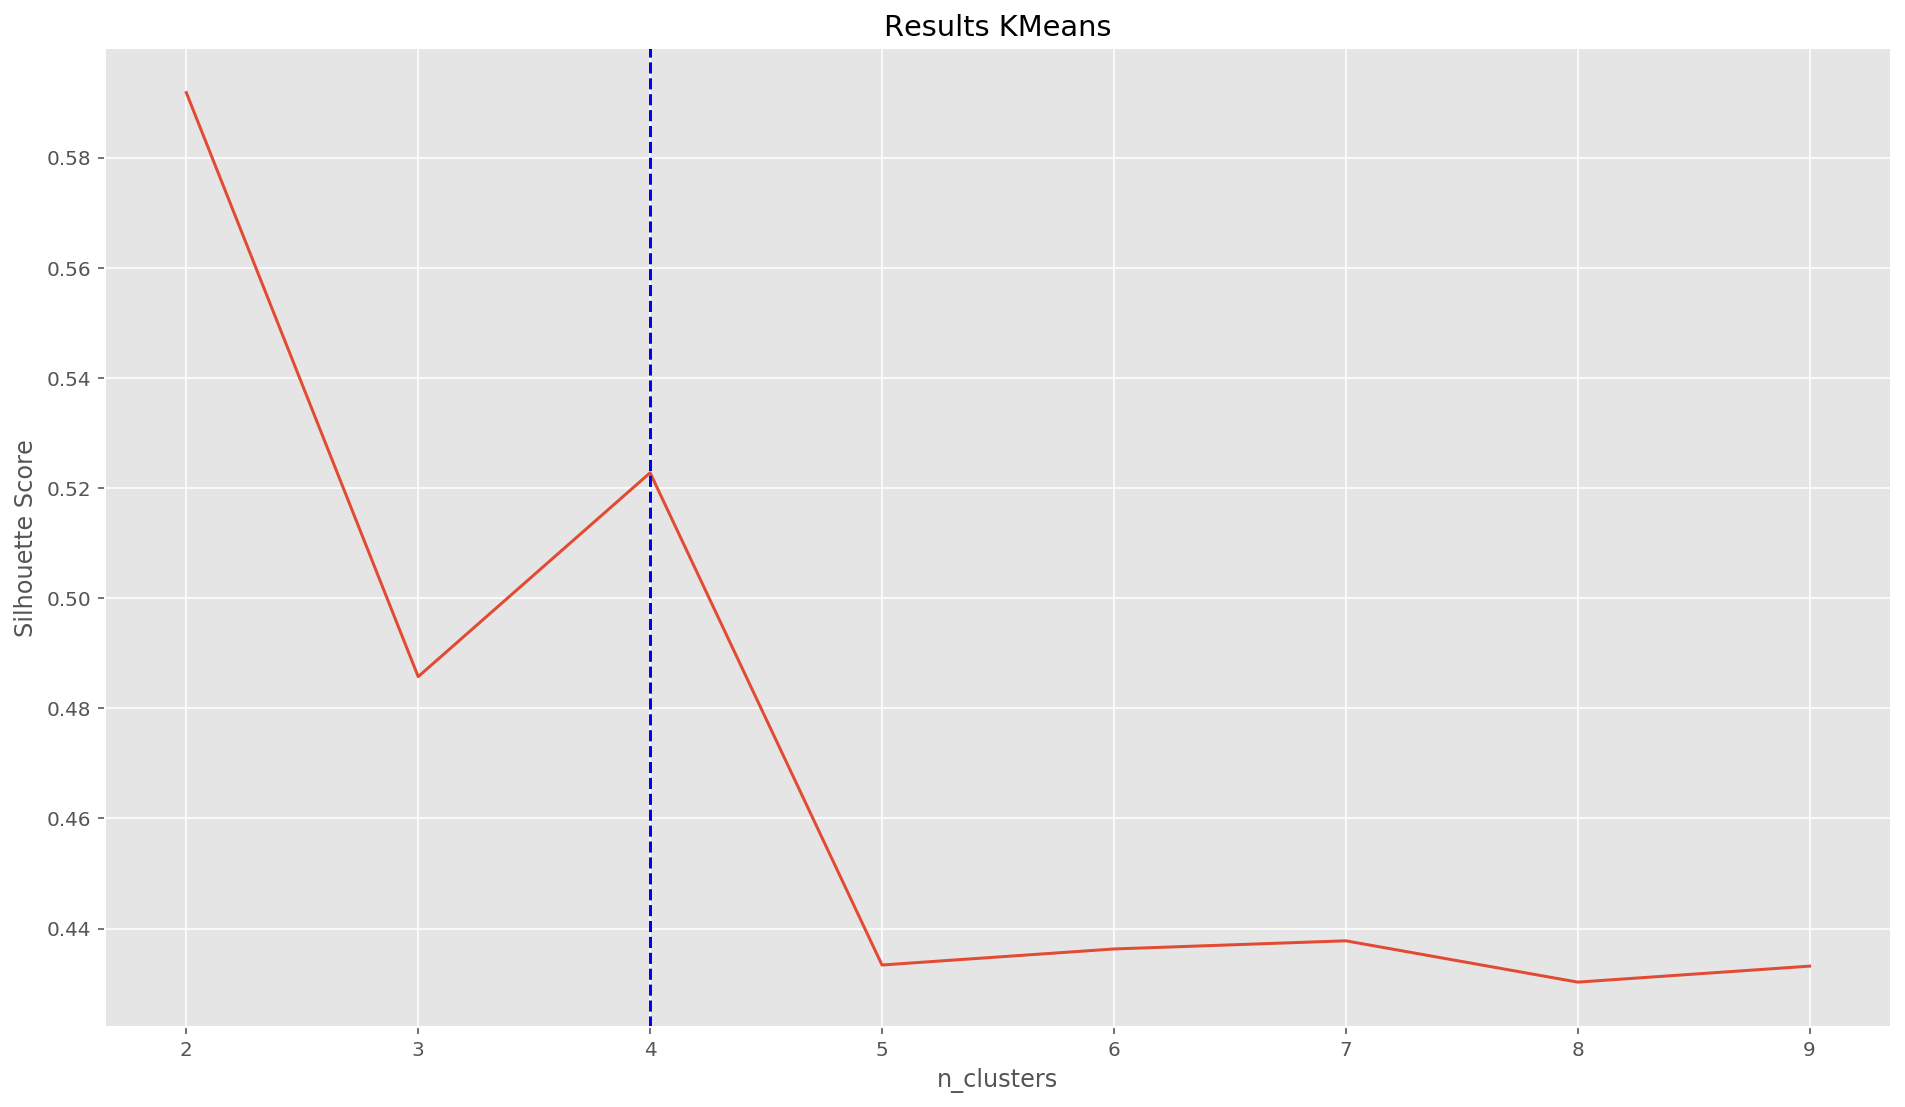

In [39]:
plt.plot(range(2,10), score);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [46]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 4, random_state=35).fit(tocluster)
centers = cluster.cluster_centers_
c_preds = cluster.predict(tocluster) #predicterd point

print(centers)

[[-1.0900261  -0.040269    0.0670218 ]
 [ 1.97216153 -1.12359114 -0.43737145]
 [ 7.59630555 -0.64140468  0.83696153]
 [ 1.67302229  2.31535247 -0.0233453 ]]


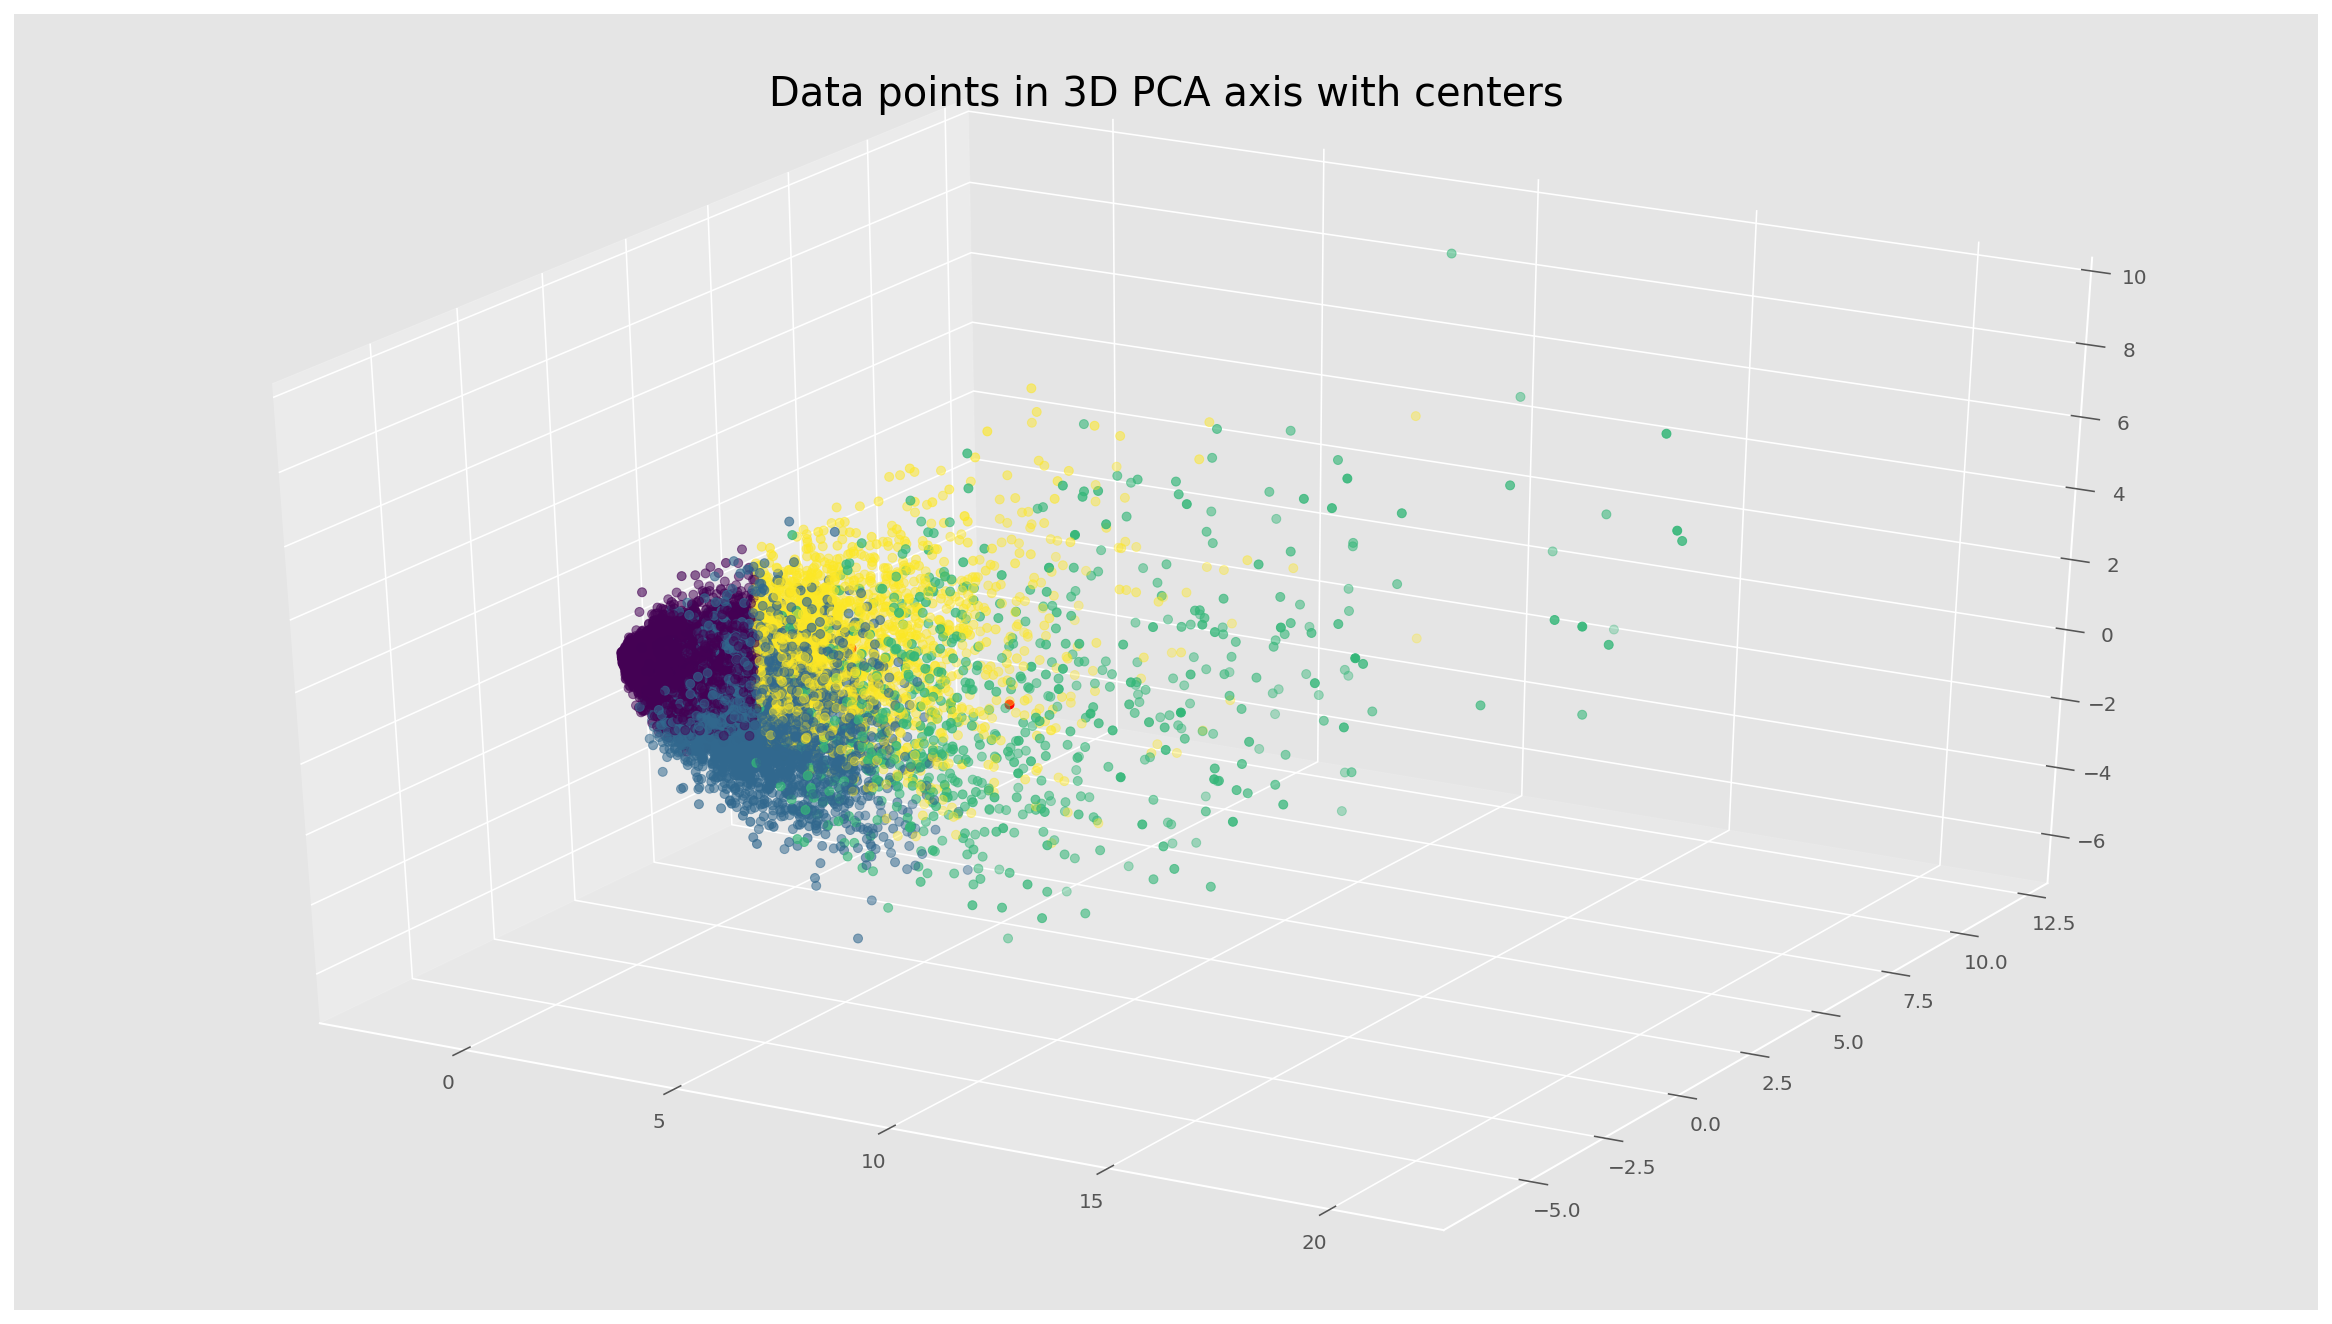

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=c_preds)
for center in centers:
    ax.scatter(center[0], center[1], center[2], color='red')

plt.title('Data points in 3D PCA axis with centers', fontsize=20)
plt.show()

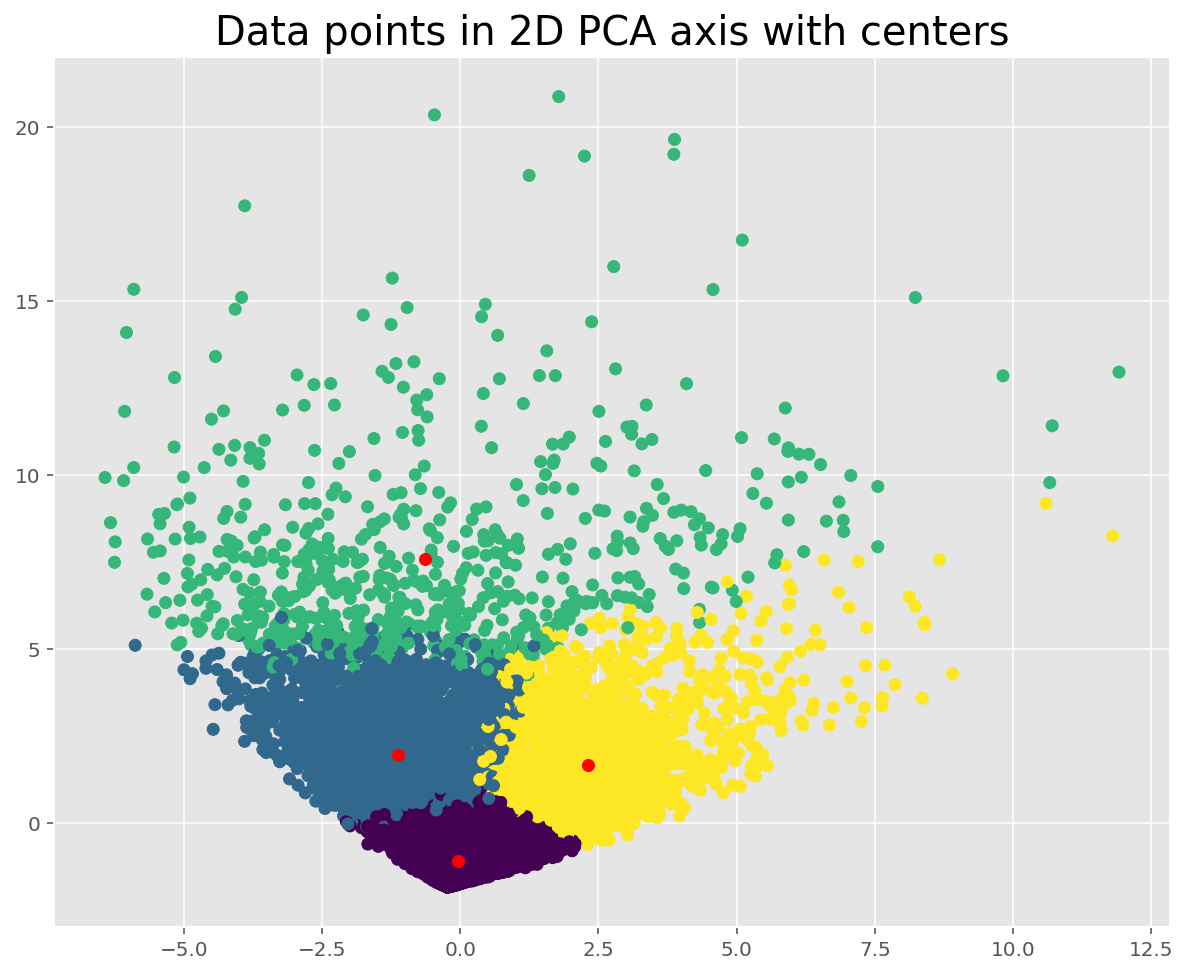

In [51]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0], c=c_preds)

for center in centers:
    plt.scatter(center[1], center[0], color='red')
    
plt.title('Data points in 2D PCA axis with centers', fontsize=20)
plt.show()

In [52]:
user_anime['clusters'] = c_preds
user_anime.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,clusters
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to clusters
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


In [60]:
#unique c_preds
unique_c_preds = np.unique(c_preds)
print(unique_c_preds)

[0 1 2 3]


In [62]:
#Characteristic of each cluster
c0 = user_anime[user_anime['clusters'] == 0].drop('clusters', axis=1).mean()
c1 = user_anime[user_anime['clusters'] == 1].drop('clusters', axis=1).mean()
c2 = user_anime[user_anime['clusters'] == 2].drop('clusters', axis=1).mean()
c3 = user_anime[user_anime['clusters'] == 3].drop('clusters', axis=1).mean()

In [64]:
#Top 15 anime which will explain characteristic of this cluster
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.320516
Shingeki no Kyojin                    0.230057
Sword Art Online                      0.198565
Fullmetal Alchemist: Brotherhood      0.181492
Code Geass: Hangyaku no Lelouch       0.178766
Sen to Chihiro no Kamikakushi         0.159971
Angel Beats!                          0.156958
Fullmetal Alchemist                   0.155595
Code Geass: Hangyaku no Lelouch R2    0.153443
Naruto                                0.145983
Elfen Lied                            0.144046
Ouran Koukou Host Club                0.133716
Mirai Nikki (TV)                      0.121090
Toradora!                             0.117647
Howl no Ugoku Shiro                   0.114419
dtype: float64

In [68]:
#Create anime info list fucntion

def Anime_Info_List(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list = list()
    
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name'] == x].episodes.values.astype(int))
            member_list.append(anime[anime['name'] == x].members.values.astype(int))
            rating_list.append(anime[anime['name'] == x].rating.values.astype(float))
            
            for y in anime[anime['name'] == x].genre.values:
                genre_list.append(y)
                
    return genre_list, episode_list, rating_list, member_list

In [69]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  Anime_Info_List(animelist)
data['genre']

0                    Drama, Romance, School, Supernatural
1       Action, Adventure, Drama, Fantasy, Magic, Mili...
2       Action, Comedy, Historical, Parody, Samurai, S...
3                                        Sci-Fi, Thriller
4       Action, Comedy, Historical, Parody, Samurai, S...
                              ...                        
7847        Action, Comedy, Hentai, Romance, Supernatural
7848                                               Hentai
7849                                               Hentai
7850                                               Hentai
7851                                       Hentai, Sports
Name: genre, Length: 7852, dtype: object

In [72]:
#Find different types of gerne

set_keywords = set()
for x in data['genre'].str.split(',').values:
    if isinstance(x, float):
        continue
    #The isinstance() function returns True if the specified object is of the specified type, otherwise False.
    set_keywords = set_keywords.union(x)
    
set_keywords

{' Adventure',
 ' Cars',
 ' Comedy',
 ' Dementia',
 ' Demons',
 ' Drama',
 ' Ecchi',
 ' Fantasy',
 ' Game',
 ' Harem',
 ' Hentai',
 ' Historical',
 ' Horror',
 ' Josei',
 ' Kids',
 ' Magic',
 ' Martial Arts',
 ' Mecha',
 ' Military',
 ' Music',
 ' Mystery',
 ' Parody',
 ' Police',
 ' Psychological',
 ' Romance',
 ' Samurai',
 ' School',
 ' Sci-Fi',
 ' Seinen',
 ' Shoujo',
 ' Shoujo Ai',
 ' Shounen',
 ' Shounen Ai',
 ' Slice of Life',
 ' Space',
 ' Sports',
 ' Super Power',
 ' Supernatural',
 ' Thriller',
 ' Vampire',
 ' Yaoi',
 ' Yuri',
 'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shounen',
 'Slice of Life',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Yaoi'}

In [74]:
len(set_keywords)

80

In [75]:
def count_word(dataframe, col, keyword):
    keyword_count = dict()
    for s in keyword:
        keyword_count[s] = 0
    for x in dataframe[col].str.split(','):
        if type(x) == float and pd.isnull(x):
            continue
        for s in [s for s in x if s in keyword]:
            if pd.notnull(s):
                keyword_count[s] = keyword_count[s] + 1
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
        

In [82]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

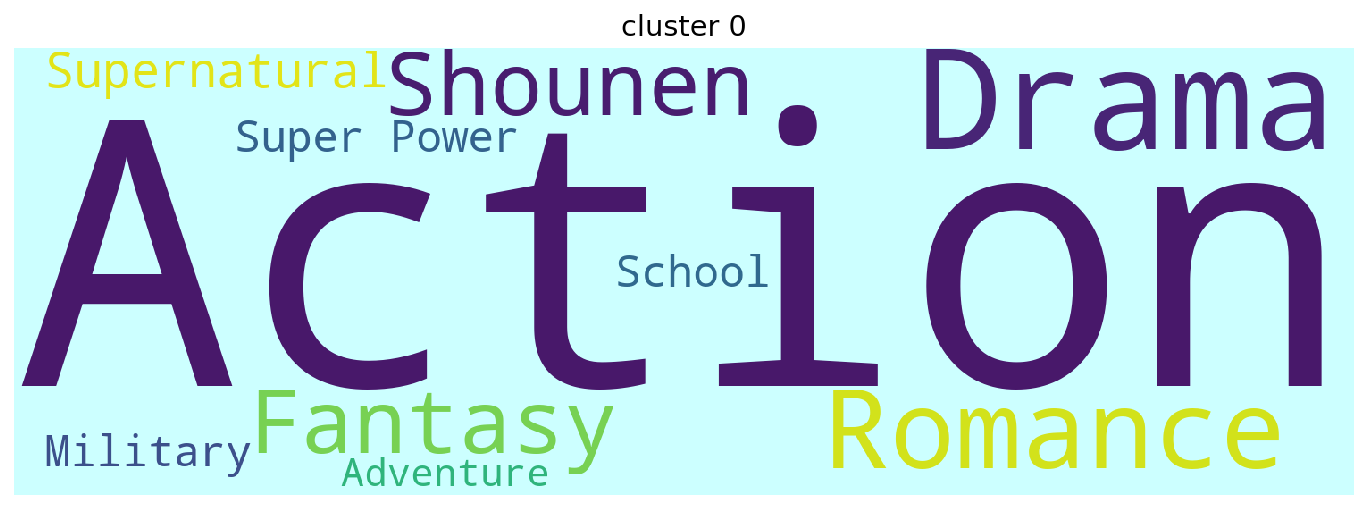

In [87]:
#####........FOR C0....#######

c0_animeList = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  Anime_Info_List(c0_animeList)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","#ccffff")

In [88]:
keyword_occurences[0:10]

[['Action', 10],
 [' Drama', 8],
 [' Romance', 5],
 [' Fantasy', 5],
 [' Shounen', 5],
 [' Supernatural', 5],
 [' Super Power', 4],
 [' Military', 4],
 [' School', 4],
 [' Adventure', 3]]

In [89]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


In [90]:
#####........FOR C1....#######
c1.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.727245
No Game No Life                                             0.643737
Sword Art Online                                            0.613998
Angel Beats!                                                0.598078
Death Note                                                  0.591169
Steins;Gate                                                 0.551517
Fullmetal Alchemist: Brotherhood                            0.539802
Toradora!                                                   0.517573
Mirai Nikki (TV)                                            0.514569
Code Geass: Hangyaku no Lelouch                             0.505858
Code Geass: Hangyaku no Lelouch R2                          0.477921
Noragami                                                    0.464704
One Punch Man                                               0.464103
Tokyo Ghoul                                                 0.462601
Ano Hi Mita Hana no Namae wo 

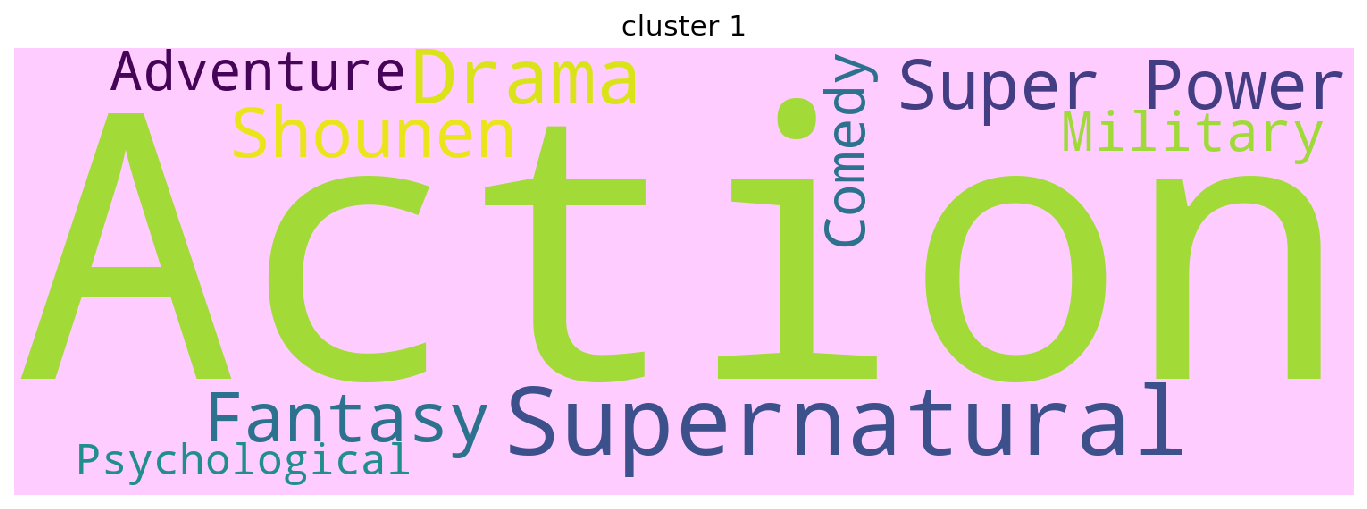

In [93]:
c1_animeList = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  Anime_Info_List(c1_animeList)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","#ffccff")

In [94]:
keyword_occurences[0:10]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Super Power', 4],
 [' Fantasy', 4],
 [' Shounen', 4],
 [' Military', 3],
 [' Adventure', 3],
 [' Comedy', 3],
 [' Psychological', 3]]

In [95]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


In [97]:
#####........FOR C2....#######
c2.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.835294
No Game No Life                                        0.819118
Toradora!                                              0.816176
Code Geass: Hangyaku no Lelouch                        0.804412
Steins;Gate                                            0.792647
Shingeki no Kyojin                                     0.783824
Code Geass: Hangyaku no Lelouch R2                     0.777941
Sword Art Online                                       0.767647
Bakemonogatari                                         0.755882
Death Note                                             0.754412
Fullmetal Alchemist: Brotherhood                       0.730882
Hataraku Maou-sama!                                    0.729412
Clannad                                                0.723529
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720588
Chuunibyou demo Koi ga Shitai!                         0.719118
dtype: float64

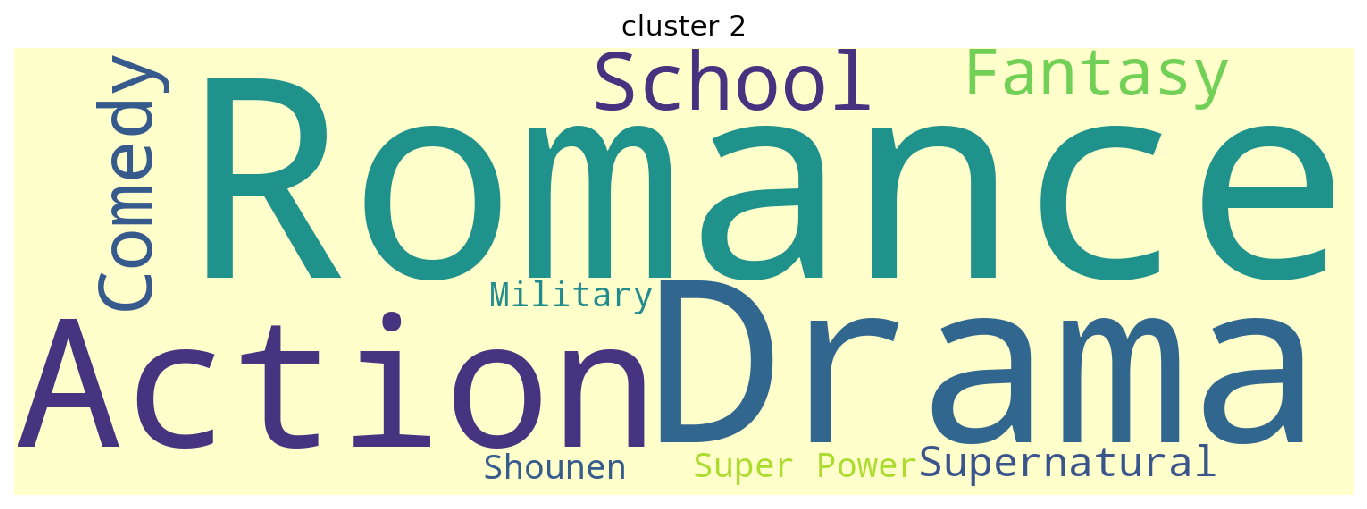

In [99]:
c2_animeList = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  Anime_Info_List(c2_animeList)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","#ffffcc")

In [100]:
keyword_occurences[0:10]

[[' Romance', 7],
 [' Drama', 7],
 ['Action', 6],
 [' School', 6],
 ['Comedy', 5],
 [' Fantasy', 5],
 [' Supernatural', 5],
 [' Super Power', 3],
 [' Military', 3],
 [' Shounen', 3]]

In [101]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


In [102]:
#####........FOR C3....#######
c3.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.667967
Code Geass: Hangyaku no Lelouch R2    0.608971
Fullmetal Alchemist                   0.600683
Sen to Chihiro no Kamikakushi         0.584105
Suzumiya Haruhi no Yuuutsu            0.550951
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509508
Mononoke Hime                         0.499269
Toradora!                             0.488542
Elfen Lied                            0.483667
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477816
dtype: float64

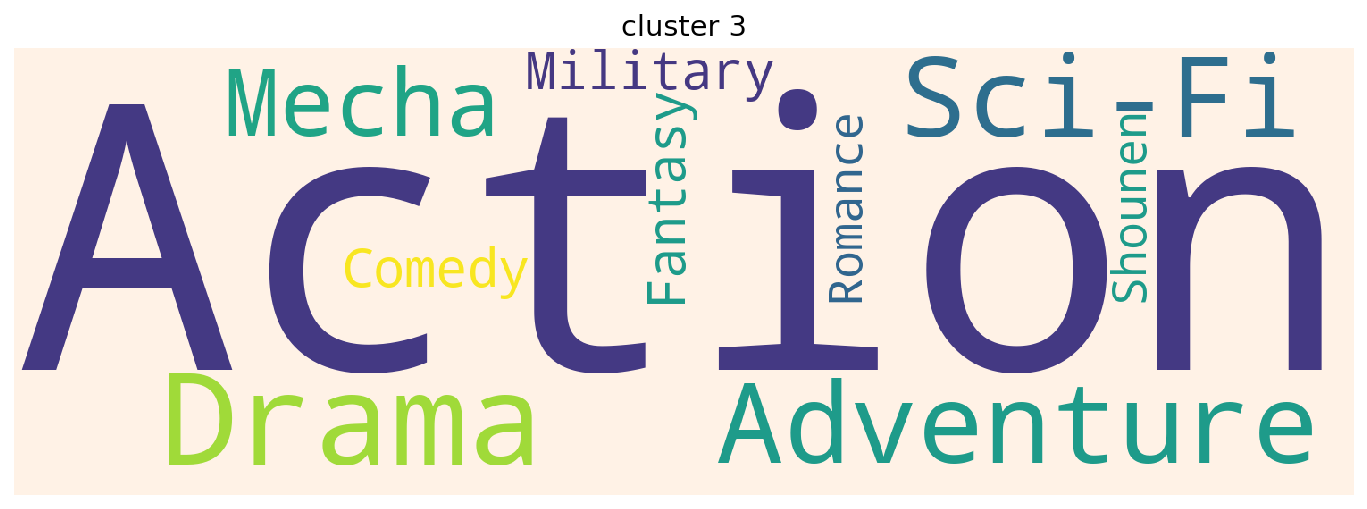

In [103]:
c3_animeList = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  Anime_Info_List(c3_animeList)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","#fff2e6")

In [104]:
keyword_occurences[0:10]

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Mecha', 4],
 [' Military', 4],
 [' Fantasy', 4],
 [' Comedy', 4],
 [' Romance', 3],
 [' Shounen', 3]]

In [105]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'.format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333
